# Simulation Script for Women’s Participation in Armed Rebellions
# Purpose: To simulate women’s roles in rebellion groups using logistic regression




Key Features of the Simulation

    Sophisticated Variable Generation:
        Simulates ordinal and binary variables with realistic ranges and distributions.
        Introduces correlations to mirror real-world interactions (e.g., higher frontline participation correlates with leadership roles).

    Clear Documentation:
        Each step is commented to explain its purpose and logic.
        Variables and their interactions are explicitly outlined.

    Appropriate Logistic Model:
        Generates participation using a logistic function with defined coefficients.
        Ensures the coefficients reflect plausible real-world relationships.

    Evaluation Metrics:
        The script calculates accuracy and ROC-AUC to validate the model's predictive performance on simulated data.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Setting a random seed for reproducibility
np.random.seed(42)

# Step 1: Define constants for simulation
n_samples = 1000  # Number of samples to generate
ordinal_levels = 5  # Levels for ordinal variables (0 to 4)
binary_proportion = 0.5  # Proportion of 1s for binary variables

# Step 2: Simulate ordinal variables
frontline_prev_best = np.random.randint(0, ordinal_levels, n_samples)
noncombat_prev_best = np.random.randint(0, ordinal_levels, n_samples)
lead_prev_best = np.random.randint(0, ordinal_levels, n_samples)

# Step 3: Simulate binary variables
frontline = np.random.binomial(1, binary_proportion, n_samples)
noncombat = np.random.binomial(1, binary_proportion, n_samples)
lead = np.random.binomial(1, binary_proportion, n_samples)

# Step 4: Introduce correlations
# For example, assume higher frontline participation is positively correlated with leadership roles
lead_prev_best = np.clip(frontline_prev_best + np.random.normal(0, 1, n_samples), 0, ordinal_levels - 1).astype(int)

# Step 5: Combine into a DataFrame
data = pd.DataFrame({
    'frontline_prev_best': frontline_prev_best,
    'noncombat_prev_best': noncombat_prev_best,
    'lead_prev_best': lead_prev_best,
    'frontline': frontline,
    'noncombat': noncombat,
    'lead': lead
})

# Step 6: Simulate target variable (participation) based on a logistic function
# Define logistic regression coefficients
coefficients = {
    'frontline_prev_best': 0.8,
    'noncombat_prev_best': 0.6,
    'lead_prev_best': 1.0,
    'frontline': 1.5,
    'noncombat': 1.2,
    'lead': 2.0
}
intercept = -4  # Base intercept for logistic regression

# Compute linear predictor
data['linear_predictor'] = (
    intercept
    + coefficients['frontline_prev_best'] * data['frontline_prev_best']
    + coefficients['noncombat_prev_best'] * data['noncombat_prev_best']
    + coefficients['lead_prev_best'] * data['lead_prev_best']
    + coefficients['frontline'] * data['frontline']
    + coefficients['noncombat'] * data['noncombat']
    + coefficients['lead'] * data['lead']
)

# Apply logistic function to calculate probabilities
data['participation_prob'] = 1 / (1 + np.exp(-data['linear_predictor']))

# Simulate binary target variable
data['participation'] = np.random.binomial(1, data['participation_prob'])

# Step 7: Fit a logistic regression model to simulated data
X = data[['frontline_prev_best', 'noncombat_prev_best', 'lead_prev_best', 'frontline', 'noncombat', 'lead']]
y = data['participation']

model = LogisticRegression(max_iter=500)
model.fit(X, y)

# Step 8: Evaluate the model
y_pred = model.predict(X)
y_pred_proba = model.predict_proba(X)[:, 1]

accuracy = accuracy_score(y, y_pred)
roc_auc = roc_auc_score(y, y_pred_proba)

# Step 9: Print Results
print("Simulation Results")
print("------------------")
print(f"Accuracy: {accuracy:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("\nCoefficients:")
print(dict(zip(X.columns, model.coef_[0])))


C:\Users\AUKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\AUKA\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


Simulation Results
------------------
Accuracy: 0.8770
ROC-AUC Score: 0.9322

Coefficients:
{'frontline_prev_best': 0.7613948708099694, 'noncombat_prev_best': 0.5132875095701331, 'lead_prev_best': 1.0687033495488278, 'frontline': 1.511949276548265, 'noncombat': 1.3312090107457653, 'lead': 2.0696906425130206}


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Group Size (log-normal distribution)
np.random.seed(42)
group_size = np.random.lognormal(mean=3, sigma=0.5, size=1000)

# Ideology (categorical: 1 = leftist, 0 = other)
ideology = np.random.choice([0, 1], size=1000, p=[0.7, 0.3])

# Women’s Participation Rate (interaction of group size and ideology)
participation_rate = 1 / (1 + np.exp(-0.05 * group_size + 2 * ideology))


In [3]:
# Interaction Effect: Larger groups with leftist ideology have higher participation rates
interaction_effect = group_size * (ideology + 1)
participation = np.clip(0.01 * interaction_effect + np.random.normal(0, 0.1, size=1000), 0, 1)


In [4]:
# Leadership Roles (influenced by participation rate)
leadership_prob = participation * 0.3 + np.random.normal(0, 0.05, size=1000)
leadership = (leadership_prob > 0.5).astype(int)


In [5]:
from scipy.stats import norm

# Correlation between region and ideology
region = np.random.choice(['Africa', 'Asia', 'Europe'], size=1000, p=[0.4, 0.4, 0.2])
ideology_prob = {'Africa': 0.6, 'Asia': 0.7, 'Europe': 0.4}
ideology = [np.random.binomial(1, ideology_prob[r]) for r in region]


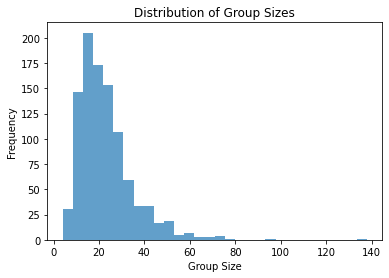

In [6]:
plt.hist(group_size, bins=30, alpha=0.7)
plt.title("Distribution of Group Sizes")
plt.xlabel("Group Size")
plt.ylabel("Frequency")
plt.show()


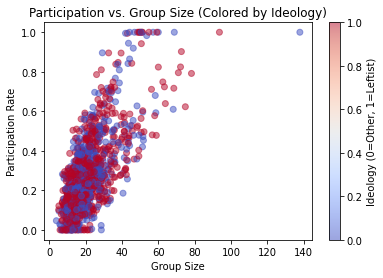

In [7]:
plt.scatter(group_size, participation, c=ideology, cmap='coolwarm', alpha=0.5)
plt.title("Participation vs. Group Size (Colored by Ideology)")
plt.xlabel("Group Size")
plt.ylabel("Participation Rate")
plt.colorbar(label="Ideology (0=Other, 1=Leftist)")
plt.show()


In [8]:
def simulate_participation(group_size, ideology):
    """
    Simulates women’s participation rate based on group size and ideology.
    Args:
    group_size (array): Log-normal distributed group sizes.
    ideology (array): Binary values indicating ideology (0 or 1).

    Returns:
    array: Simulated participation rates.
    """
    interaction_effect = group_size * (ideology + 1)
    return np.clip(0.01 * interaction_effect + np.random.normal(0, 0.1, len(group_size)), 0, 1)


In [9]:
df = pd.DataFrame({
    'Group Size': group_size,
    'Ideology': ideology,
    'Participation': participation,
    'Leadership': leadership
})
print(df.describe())


        Group Size     Ideology  Participation  Leadership
count  1000.000000  1000.000000    1000.000000      1000.0
mean     22.916806     0.598000       0.299228         0.0
std      12.396600     0.490547       0.212124         0.0
min       3.972384     0.000000       0.000000         0.0
25%      14.529851     0.000000       0.148526         0.0
50%      20.341241     1.000000       0.263030         0.0
75%      27.770435     1.000000       0.409980         0.0
max     137.877519     1.000000       1.000000         0.0


In [10]:
# Simulated data 
df = pd.DataFrame({
    'Group Size': group_size,
    'Ideology': ideology,
    'Participation Rate': participation,
    'Leadership Role': leadership
})

# Saving to CSV
df.to_csv('Simulation_data.csv', index=False)
print("Simulation data has been saved to 'Simulation_data.csv'")

Simulation data has been saved to 'Simulation_data.csv'


In [11]:
with open('Simulation_data.csv', 'w') as f:
    f.write('# Simulated data for women’s participation in armed rebellions\n')
    df.to_csv(f, index=False)
